In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.datasets._samples_generator import make_blobs
import seaborn as sns
from scipy.spatial.distance import euclidean
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
def _inertia_dense(X, centers, labels, unique_label):
    # X ==> Datasets
    # centers ==> Array of centroids of clusters
    # lablels ==> the group or cluster which a point belongs
    # unique_label ==> List of unique clusters
    n_samples = X.shape[0] # Number of rows of dataset
    sq_dist = 0
    new_cond = 0
    used_cluster = []
    for cluster_A in unique_label:
        used_cluster.append(cluster_A)
        for cluster_B in unique_label:
            sum_weight = 0
            if cluster_A != cluster_B and cluster_B not in used_cluster:
                for i in range(n_samples):
                    j = labels[i]
                    if j == cluster_A:
                        for k in range(n_samples):
                            l = labels[k]
                            if l == cluster_B:
                                weight_1 = 1 / (1 + euclidean(X[i, :],centers[cluster_A, :])) # The weight of the point i in cluster_A
                                weight_2 = 1 / (1 + euclidean(X[k, :],centers[cluster_B, :])) # The weight of the point k in cluster_B
                                sq_dist += weight_1 * weight_2 * euclidean(X[i, :],X[k, :]) # Euclidean distance between the pomt i and the point k multiply by weights
                                sum_weight += weight_1 * weight_2 # Sum of the product of weights
            if sum_weight!=0:
                new_cond += (1 / sum_weight) * sq_dist # update inertia

    return new_cond # Return Inertia

### Example 1: Apply kmeans in iris datasets which contains 3 groups

In [3]:
X, y = load_iris(return_X_y=True)

<AxesSubplot:>

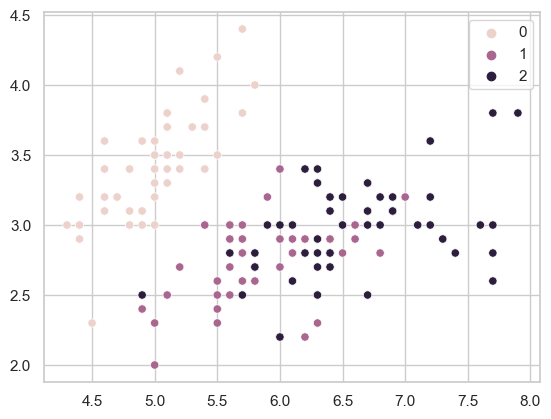

In [4]:
sns.scatterplot(X[:,0],X[:,1], hue=y)

In [5]:
inertia = []
inertia_new =[]
for n_clusters in range(2,5):
    model_1 = KMeans(n_clusters=n_clusters,init = 'k-means++',random_state=42)
    model_1.fit(X)
    inertia.append(model_1.inertia_)
    unique_label = []
    for i in model_1.labels_:
        if i not in unique_label:
            unique_label.append(i)
    inertia_new.append(_inertia_dense(X,model_1.cluster_centers_,model_1.labels_,unique_label))
    

In [6]:
inertia_new_ = [1/i for i in inertia_new]

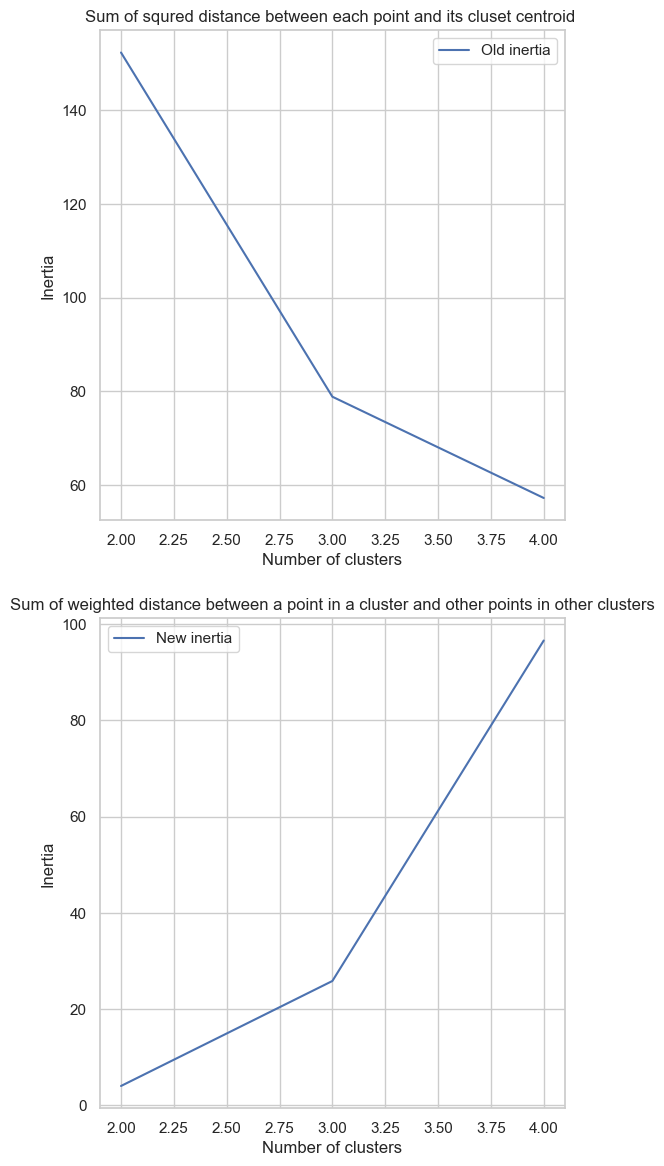

In [7]:
x = list(range(2,5))

plt.figure(figsize=(6,14))
# plotting the old inertia points 
plt.subplot(2,1,1)
plt.plot(x, inertia, label = "Old inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of squred distance between each point and its cluset centroid ')
# show a legend on the plot
plt.legend()
# plotting the new inertia points 
plt.subplot(2,1,2)
plt.plot(x, inertia_new, label = "New inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of weighted distance between a point in a cluster and other points in other clusters')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#### Conclusion:
Both ot them (old and new formula) consider that 3 is the optimal k for kmeans

### Example 2:
Crate a new dataset using make_blobs which have 2 columns and the points are separated into 3 groups

In [8]:
X, y = make_blobs(n_samples=100,n_features=2,centers=3, random_state=42,shuffle=True,cluster_std=1)

<AxesSubplot:>

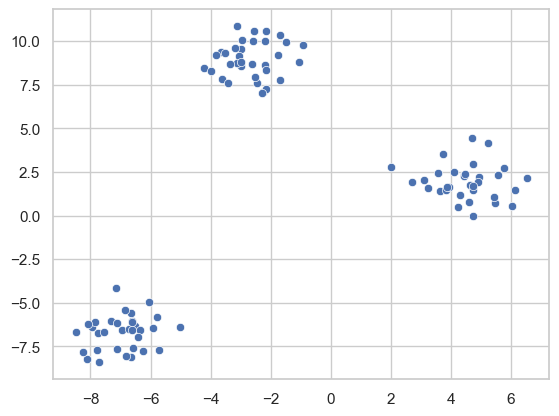

In [9]:
sns.scatterplot(X[:,0],X[:,1])

In [10]:
inertia = []
inertia_new =[]
for n_clusters in range(2,6):
    model_1 = KMeans(n_clusters=n_clusters,random_state=42,init = 'k-means++')
    model_1.fit(X)
    inertia.append(model_1.inertia_)
    unique_label = []
    for i in model_1.labels_:
        if i not in unique_label:
            unique_label.append(i)
    inertia_new.append(_inertia_dense(X,model_1.cluster_centers_,model_1.labels_,unique_label))
    

In [11]:
inertia_new_ = [1/i for i in inertia_new]

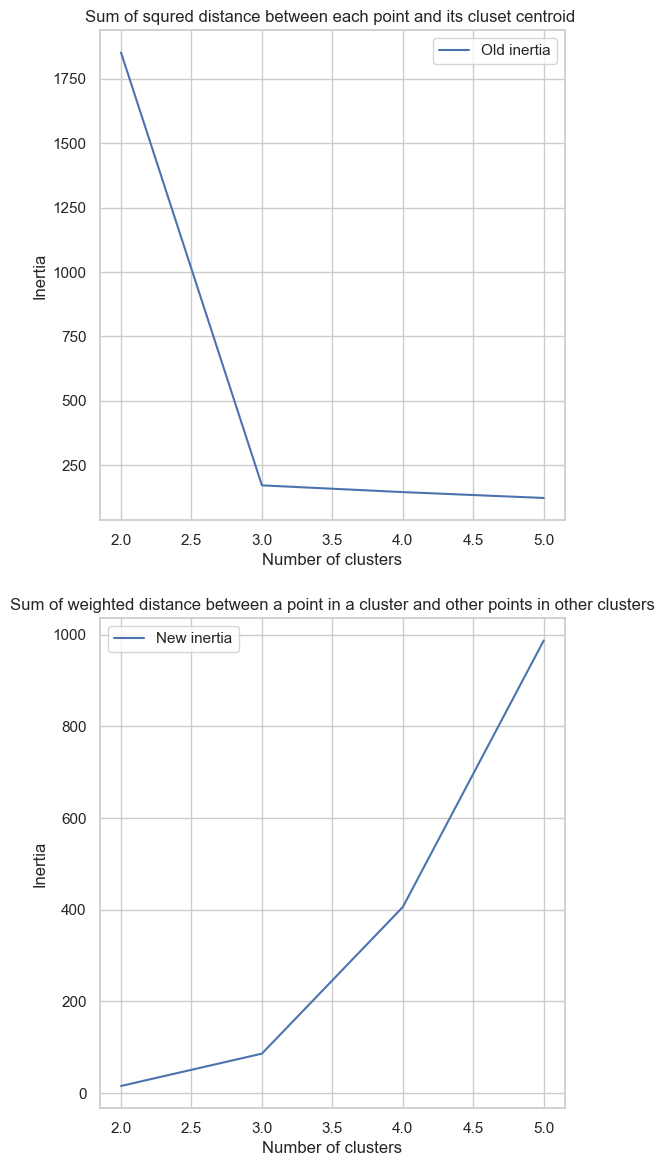

In [12]:
x = list(range(2,6))

plt.figure(figsize=(6,14))
# plotting the old inertia points 
plt.subplot(2,1,1)
plt.plot(x, inertia, label = "Old inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of squred distance between each point and its cluset centroid ')
# show a legend on the plot
plt.legend()
# plotting the new inertia points 
plt.subplot(2,1,2)
plt.plot(x, inertia_new, label = "New inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of weighted distance between a point in a cluster and other points in other clusters')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#### Conclusion:
Both ot them (old and new formula) consider that 3 is the optimal k for kmeans

In [13]:
model_1 = KMeans(n_clusters=3,random_state=42)
model_1.fit(X)

KMeans(n_clusters=3, random_state=42)

<AxesSubplot:>

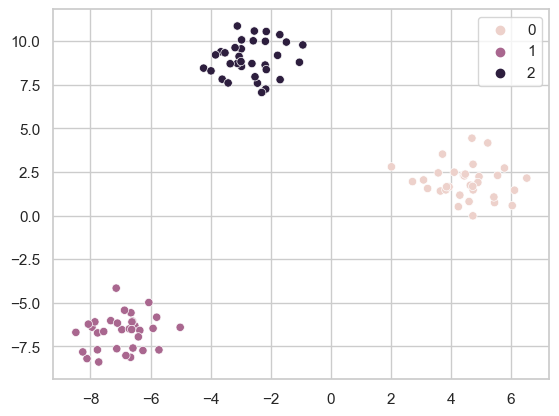

In [14]:
model_1 = KMeans(n_clusters=3,random_state=42)
model_1.fit(X)
sns.scatterplot(X[:,0],X[:,1], hue=model_1.labels_)

### Example 3:
Generate a new dataset with 3 columns and 3 groups using make_blobs fuction from scikit-learn

In [15]:
X, y = make_blobs(n_samples=1000,n_features=3 ,centers=3, random_state=42,cluster_std=1)

<AxesSubplot:>

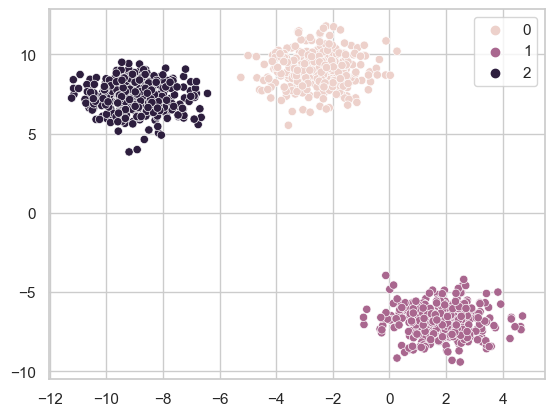

In [16]:
sns.scatterplot(X[:,0],X[:,1], hue=y)

In [17]:
inertia = []
inertia_new =[]
for n_clusters in range(2,6):
    model_1 = KMeans(n_clusters=n_clusters,random_state=42)
    model_1.fit(X)
    inertia.append(model_1.inertia_)
    unique_label = []
    for i in model_1.labels_:
        if i not in unique_label:
            unique_label.append(i)
    inertia_new.append(_inertia_dense(X,model_1.cluster_centers_,model_1.labels_,unique_label))
    

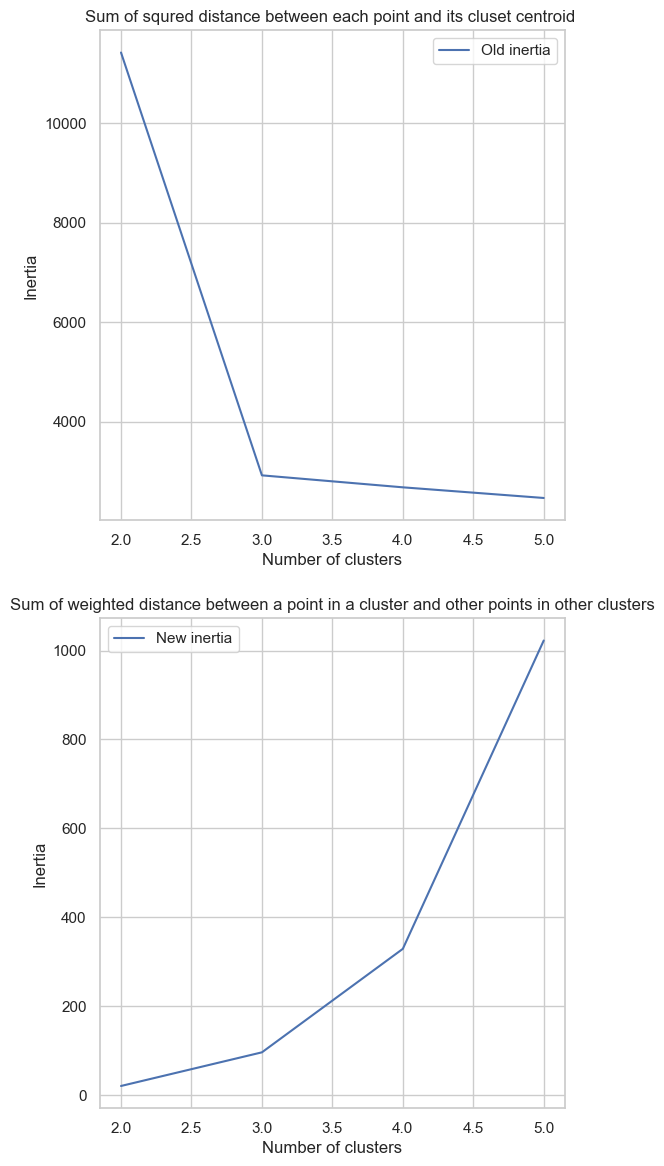

In [18]:
x = list(range(2,6))

plt.figure(figsize=(6,14))
# plotting the old inertia points 
plt.subplot(2,1,1)
plt.plot(x, inertia, label = "Old inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of squred distance between each point and its cluset centroid ')
# show a legend on the plot
plt.legend()
# plotting the new inertia points 
plt.subplot(2,1,2)
plt.plot(x, inertia_new, label = "New inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of weighted distance between a point in a cluster and other points in other clusters')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#### Conclusion:
Both ot them (old and new formula) consider that 3 is the optimal k for kmeans

<AxesSubplot:>

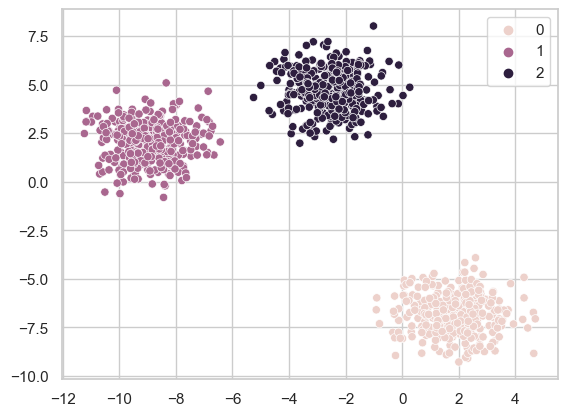

In [19]:
model_1 = KMeans(n_clusters=3,random_state=42)
model_1.fit(X)
sns.scatterplot(X[:,0],X[:,2], hue=model_1.labels_)

### Example 4:
Generate a new dataset with 3 columns and 5 groups. 
Note there are 3 groups clusets to each other

<AxesSubplot:>

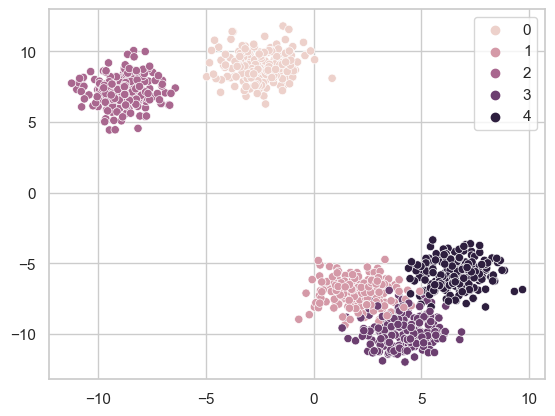

In [20]:
X, y = make_blobs(n_samples=1000,n_features=3 ,centers=5, random_state=42,cluster_std=1)
sns.scatterplot(X[:,0],X[:,1], hue=y)

In [21]:
inertia = []
inertia_new =[]
for n_clusters in range(2,8):
    model_1 = KMeans(n_clusters=n_clusters,random_state=42)
    model_1.fit(X)
    inertia.append(model_1.inertia_)
    unique_label = []
    for i in model_1.labels_:
        if i not in unique_label:
            unique_label.append(i)
    inertia_new.append(_inertia_dense(X,model_1.cluster_centers_,model_1.labels_,unique_label))

In [22]:
inertia_new_ = [1/i for i in inertia_new]

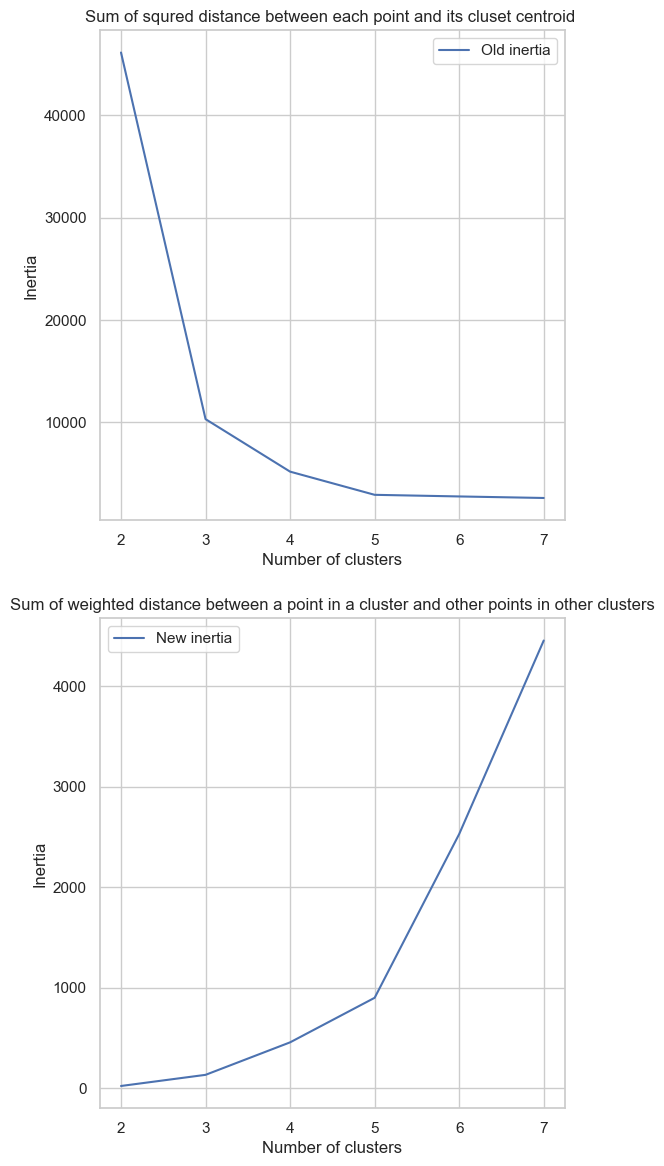

In [23]:
x = list(range(2,8))

plt.figure(figsize=(6,14))
# plotting the old inertia points 
plt.subplot(2,1,1)
plt.plot(x, inertia, label = "Old inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of squred distance between each point and its cluset centroid ')
# show a legend on the plot
plt.legend()
# plotting the new inertia points 
plt.subplot(2,1,2)
plt.plot(x, inertia_new, label = "New inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of weighted distance between a point in a cluster and other points in other clusters')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#### Conclusion:
3 is the optimal k for kameans but in the other hand 5 is the optimal based on the new formula

### Example 5:
Generate a new dataset with 3 columns and 6 groups. 
Note there are 3 groups clusets to each other

<AxesSubplot:>

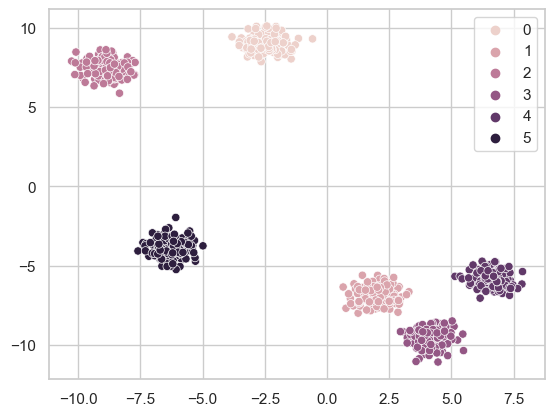

In [24]:
X, y = make_blobs(n_samples=1000,n_features=3 ,centers=6, random_state=42,cluster_std=.5)
sns.scatterplot(X[:,0],X[:,1], hue=y)

In [25]:
inertia = []
inertia_new =[]
for n_clusters in range(2,10):
    model_1 = KMeans(n_clusters=n_clusters,random_state=42)
    model_1.fit(X)
    inertia.append(model_1.inertia_)
    unique_label = []
    for i in model_1.labels_:
        if i not in unique_label:
            unique_label.append(i)
    inertia_new.append(_inertia_dense(X,model_1.cluster_centers_,model_1.labels_,unique_label))

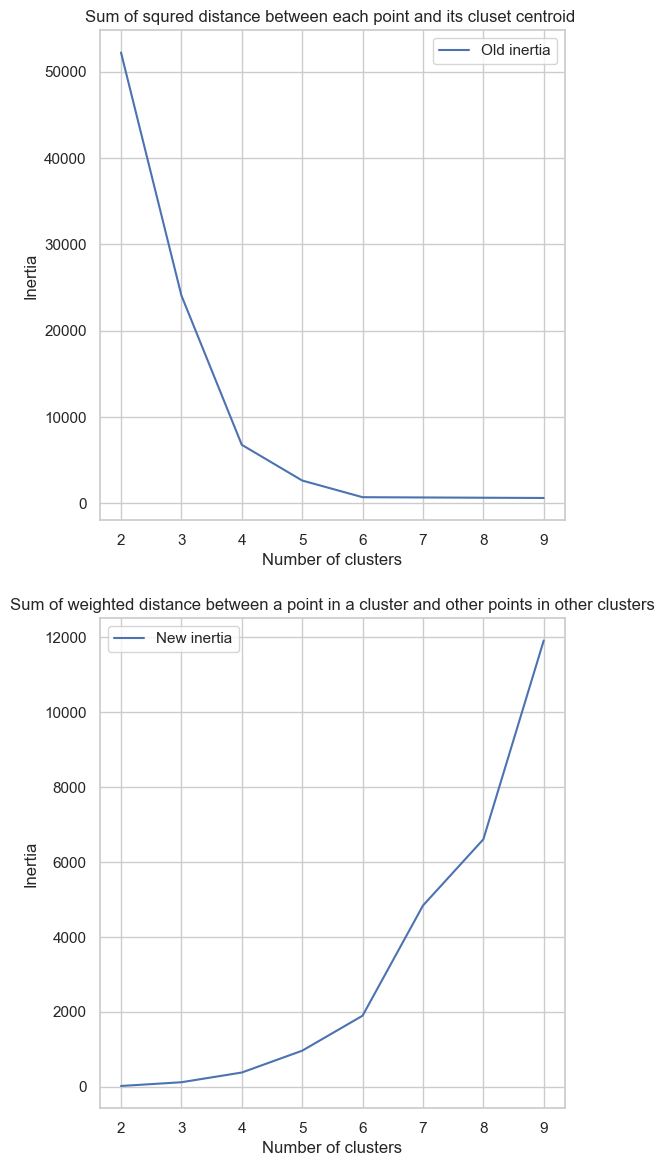

In [26]:
x = list(range(2,10))

plt.figure(figsize=(6,14))
# plotting the old inertia points 
plt.subplot(2,1,1)
plt.plot(x, inertia, label = "Old inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of squred distance between each point and its cluset centroid ')
# show a legend on the plot
plt.legend()
# plotting the new inertia points 
plt.subplot(2,1,2)
plt.plot(x, inertia_new, label = "New inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of weighted distance between a point in a cluster and other points in other clusters')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#### Conclusion:
4 is the optimal k for kameans but in the other hand 6 is the optimal based on the new formula

### Example 6:
Generate a new dataset with 7 columns and 7 groups. 
Note there are some groups thate are cluset to each other

<AxesSubplot:>

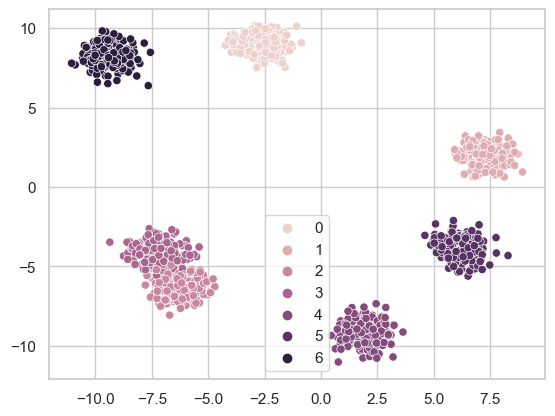

In [27]:
X, y = make_blobs(n_samples=1500,n_features=7 ,centers=7, random_state=42,cluster_std=.6)
sns.scatterplot(X[:,0],X[:,1], hue=y)

In [28]:
inertia = []
inertia_new =[]
for n_clusters in range(2,10):
    model_1 = KMeans(n_clusters=n_clusters,random_state=42)
    model_1.fit(X)
    inertia.append(model_1.inertia_)
    unique_label = []
    for i in model_1.labels_:
        if i not in unique_label:
            unique_label.append(i)
    inertia_new.append(_inertia_dense(X,model_1.cluster_centers_,model_1.labels_,unique_label))

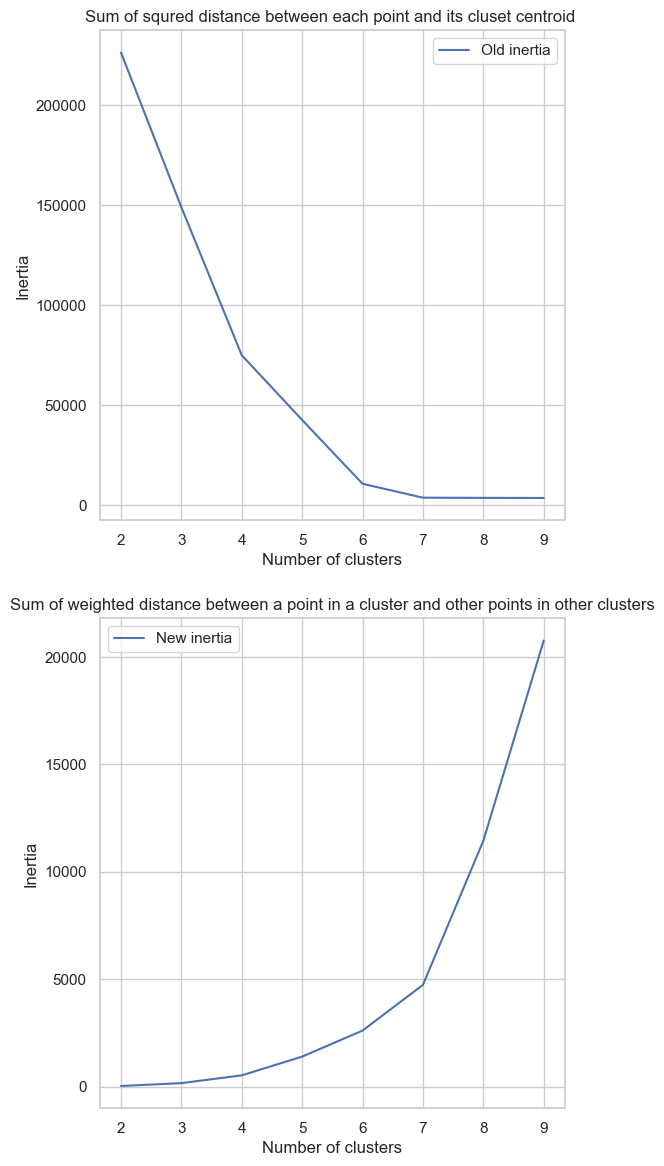

In [29]:
x = list(range(2,10))

plt.figure(figsize=(6,14))
# plotting the old inertia points 
plt.subplot(2,1,1)
plt.plot(x, inertia, label = "Old inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of squred distance between each point and its cluset centroid ')
# show a legend on the plot
plt.legend()
# plotting the new inertia points 
plt.subplot(2,1,2)
plt.plot(x, inertia_new, label = "New inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of weighted distance between a point in a cluster and other points in other clusters')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#### Conclusion
6 is the optimal k for kameans but in the other hand 7 is the optimal based on the new formula

### Example 7:
Generate a new dataset with 6 columns and 7 groups. 
Note there are some groups thate are cluset to each other

<AxesSubplot:>

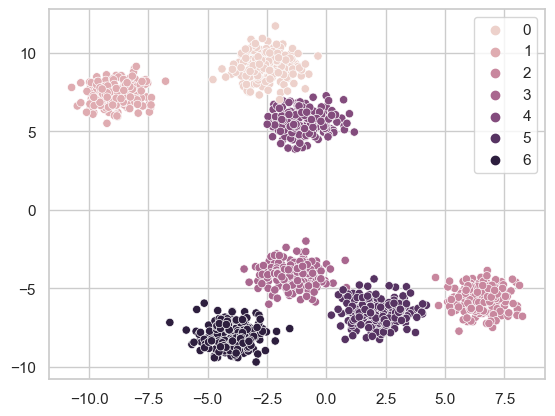

In [30]:
X, y = make_blobs(n_samples=1500,n_features=6 ,centers=7, random_state=42,cluster_std=.7)
sns.scatterplot(X[:,0],X[:,1], hue=y)

In [31]:
inertia = []
inertia_new =[]
for n_clusters in range(2,10):
    model_1 = KMeans(n_clusters=n_clusters,random_state=42)
    model_1.fit(X)
    inertia.append(model_1.inertia_)
    unique_label = []
    for i in model_1.labels_:
        if i not in unique_label:
            unique_label.append(i)
    inertia_new.append(_inertia_dense(X,model_1.cluster_centers_,model_1.labels_,unique_label))

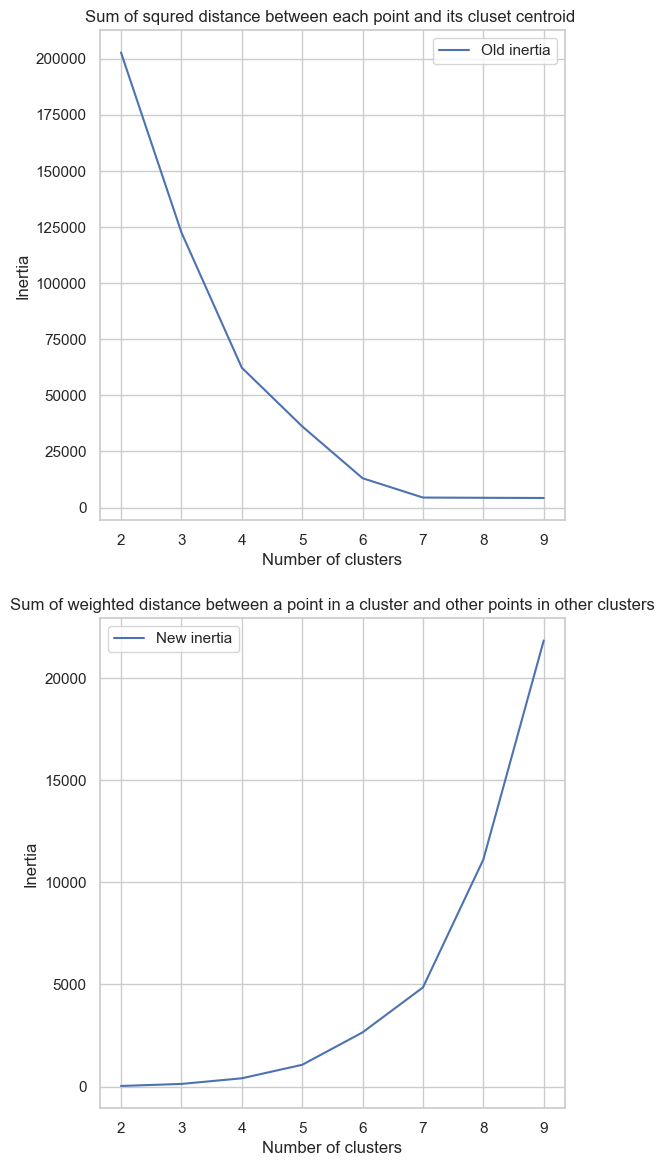

In [32]:
x = list(range(2,10))

plt.figure(figsize=(6,14))
# plotting the old inertia points 
plt.subplot(2,1,1)
plt.plot(x, inertia, label = "Old inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of squred distance between each point and its cluset centroid ')
# show a legend on the plot
plt.legend()
# plotting the new inertia points 
plt.subplot(2,1,2)
plt.plot(x, inertia_new, label = "New inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of weighted distance between a point in a cluster and other points in other clusters')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#### Conclusion
6 is the optimal k for kameans but in the other hand 7 is the optimal based on the new formula

### Example 8:
Generate a new dataset with 6 columns and 5 groups. 
Note there are some groups thate are cluset to each other

<AxesSubplot:>

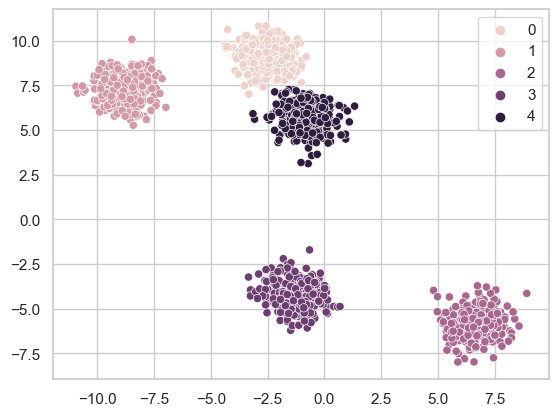

In [33]:
X, y = make_blobs(n_samples=1500,n_features=6 ,centers=5, random_state=42,cluster_std=.7)
sns.scatterplot(X[:,0],X[:,1], hue=y)

In [34]:
inertia = []
inertia_new =[]
for n_clusters in range(2,8):
    model_1 = KMeans(n_clusters=n_clusters,random_state=42)
    model_1.fit(X)
    inertia.append(model_1.inertia_)
    unique_label = []
    for i in model_1.labels_:
        if i not in unique_label:
            unique_label.append(i)
    inertia_new.append(_inertia_dense(X,model_1.cluster_centers_,model_1.labels_,unique_label))

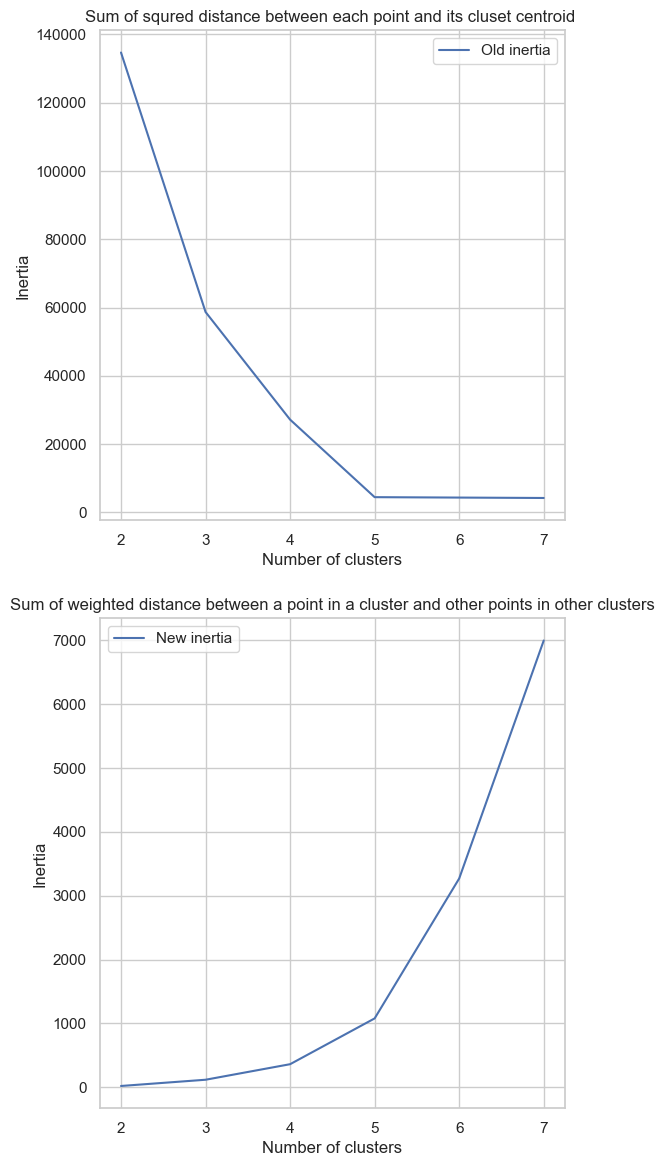

In [35]:
x = list(range(2,8))

plt.figure(figsize=(6,14))
# plotting the old inertia points 
plt.subplot(2,1,1)
plt.plot(x, inertia, label = "Old inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of squred distance between each point and its cluset centroid ')
# show a legend on the plot
plt.legend()
# plotting the new inertia points 
plt.subplot(2,1,2)
plt.plot(x, inertia_new, label = "New inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of weighted distance between a point in a cluster and other points in other clusters')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#### Conclusion:
Both ot them (old and new formula) consider that 5 is the optimal k for kmeans

### Example 9:
Generate a new dataset with 6 columns and 4 groups. 
Note there are some groups thate are cluset to each other

<AxesSubplot:>

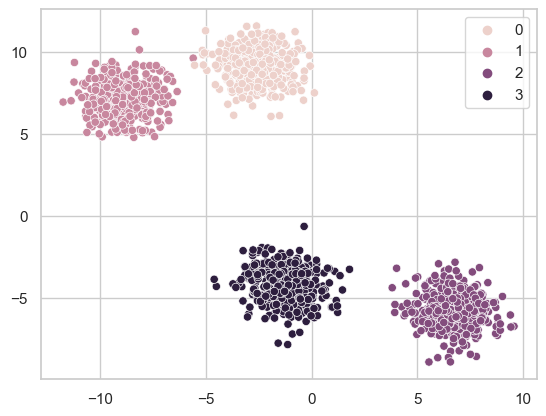

In [36]:
X, y = make_blobs(n_samples=1500,n_features=6 ,centers=4, random_state=42,cluster_std=1)
sns.scatterplot(X[:,0],X[:,1], hue=y)

In [37]:
inertia = []
inertia_new =[]
for n_clusters in range(2,8):
    model_1 = KMeans(n_clusters=n_clusters,random_state=42)
    model_1.fit(X)
    inertia.append(model_1.inertia_)
    unique_label = []
    for i in model_1.labels_:
        if i not in unique_label:
            unique_label.append(i)
    inertia_new.append(_inertia_dense(X,model_1.cluster_centers_,model_1.labels_,unique_label))

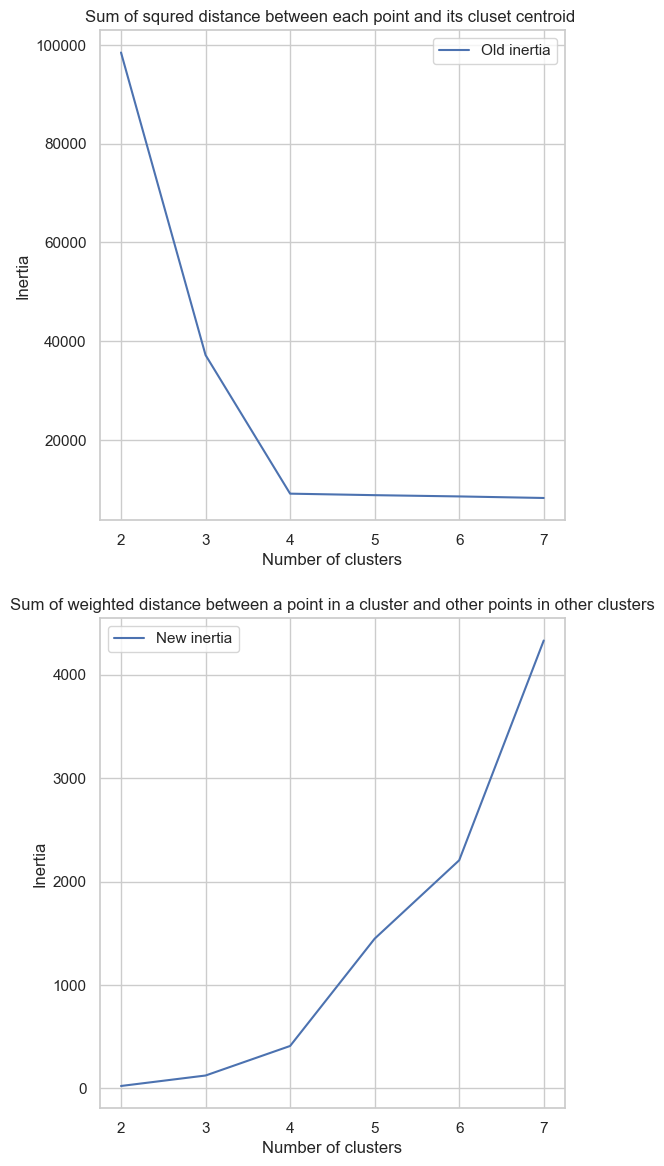

In [38]:
x = list(range(2,8))

plt.figure(figsize=(6,14))
# plotting the old inertia points 
plt.subplot(2,1,1)
plt.plot(x, inertia, label = "Old inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of squred distance between each point and its cluset centroid ')
# show a legend on the plot
plt.legend()
# plotting the new inertia points 
plt.subplot(2,1,2)
plt.plot(x, inertia_new, label = "New inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of weighted distance between a point in a cluster and other points in other clusters')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#### Conclusion:
Both ot them (old and new formula) consider that 4 is the optimal k for kmeans

### Example 10:
Generate a new dataset with 3 columns and 10 groups. 
Note there are some groups thate are cluset to each other

<AxesSubplot:>

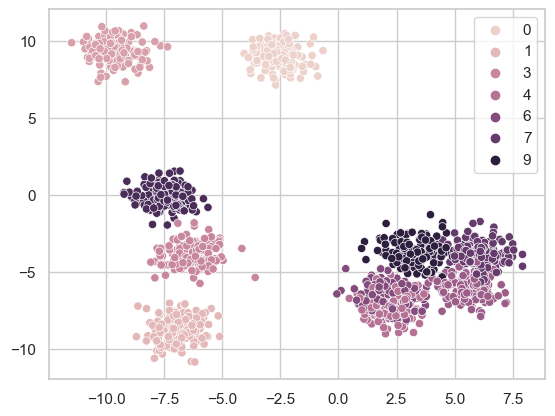

In [39]:
X, y = make_blobs(n_samples=1500,n_features=5 ,centers=10, random_state=42,cluster_std=.7)
sns.scatterplot(X[:,0],X[:,1], hue=y)

In [40]:
inertia = []
inertia_new =[]
for n_clusters in range(2,14):
    model_1 = KMeans(n_clusters=n_clusters,random_state=42)
    model_1.fit(X)
    inertia.append(model_1.inertia_)
    unique_label = []
    for i in model_1.labels_:
        if i not in unique_label:
            unique_label.append(i)
    inertia_new.append(_inertia_dense(X,model_1.cluster_centers_,model_1.labels_,unique_label))

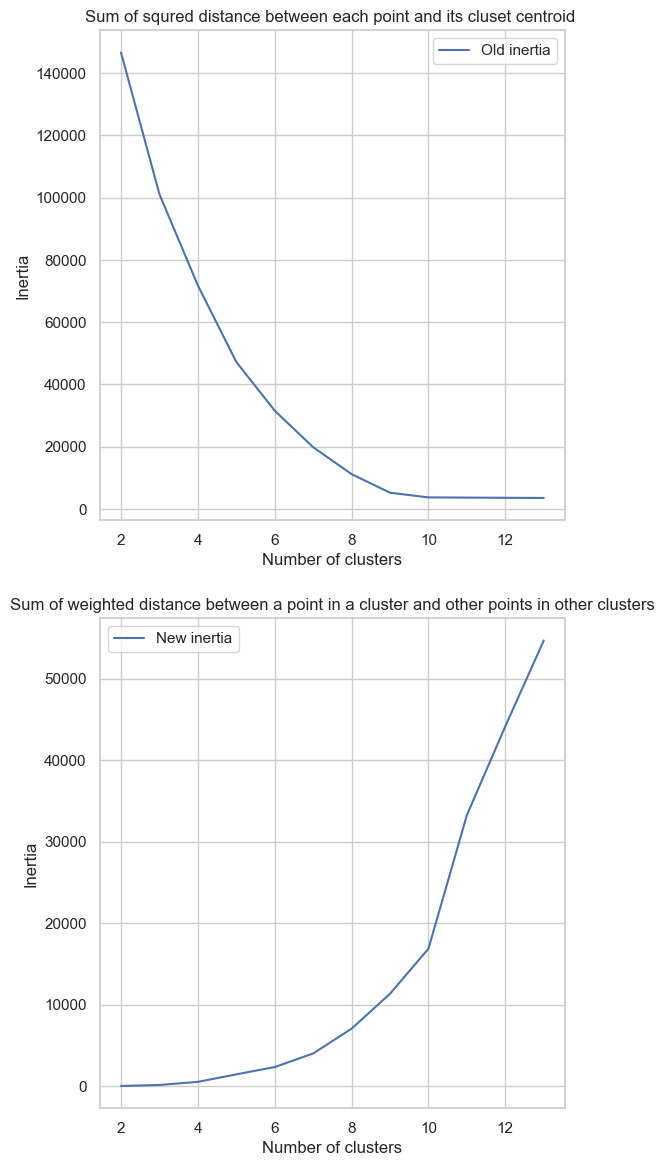

In [41]:
x = list(range(2,14))

plt.figure(figsize=(6,14))
# plotting the old inertia points 
plt.subplot(2,1,1)
plt.plot(x, inertia, label = "Old inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of squred distance between each point and its cluset centroid ')
# show a legend on the plot
plt.legend()
# plotting the new inertia points 
plt.subplot(2,1,2)
plt.plot(x, inertia_new, label = "New inertia")
plt.xlabel('Number of clusters')
# Set the y axis label of the current axis.
plt.ylabel('Inertia')
# Set a title of the current axes.
plt.title('Sum of weighted distance between a point in a cluster and other points in other clusters')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### conclusion
optimal k for old formula is 8 but for the new is 10